In [1]:
from pathlib import Path
import os
import sys

sys.path.append(Path(os.path.abspath('')).parent.parent)
os.chdir(Path(os.path.abspath('')).parent.parent)

import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

import config.settings as cset

In [39]:
# loading & preparing gdp data
gdp_df = pd.read_csv(cset.file_burke).loc[:, ['iso', 'scen', 'run', 'year', 'diff_SSP2', 'SSP2', 'SSP2_clim']]
gdp_df.loc[gdp_df.scen == 'Ref1p5', 'scen'] = 'Ref'
# only keep data for year that we are interested in: 
gdp_df = gdp_df[(gdp_df.year == cset.gdp_target_year)].copy()
# adding for compatibility with characteristics df 
gdp_df['scen_run'] = gdp_df['scen'] + '_' + gdp_df['run'].astype(str)

# loading & preparing tas_baseline data
tas_df = pd.read_csv(cset.file_tas)
# tas_df = tas_df[tas_df.year == 2015].copy()
# tas_df = tas_df.rename(columns = {'run': 'scen_run', 'tas': 'tas_soc'})
# tas_df = tas_df.dropna(subset=['tas_soc']).groupby('iso').filter(lambda x: x['tas_soc'].notna().all())
# tas_df.loc[tas_df['scen_run'].str.contains('Ref_1p5'), 'scen_run'] = tas_df['scen_run'].str.replace('Ref_1p5', 'Ref')
glmt_char_df = pd.read_csv(Path.joinpath(cset.path_MESMER_char, 'gmt_characteristics_thsld_150.csv'), index_col = 0)

gmt_df  = pd.read_csv(cset.path_MESMER_char / f'gmt_dataset.csv', index_col = 0)
columns = gmt_df.columns


In [3]:
# find paris with same max and soc temperature...: 
from itertools import product

pairs = []
for i in tqdm(range(1000), total = 1000):
    for j in range(i+1,1000):
        if (np.abs(glmt_char_df['gmt_soc'].values[i]-glmt_char_df['gmt_soc'].values[j]) < 0.01) & (np.abs(glmt_char_df['gmt_max'].values[i]-glmt_char_df['gmt_max'].values[j]) < 0.01):
            pairs.append((i,j))

  0%|          | 0/1000 [00:00<?, ?it/s]

In [4]:
iso = 'AUS'

diff      = []
overshoot = []
for i,j in tqdm(pairs, total = len(pairs)): 
    country_df = gdp_df[gdp_df.iso == iso].copy()
    os_tmp   = glmt_char_df['gmt_eoc'].values[i]-glmt_char_df['gmt_eoc'].values[j]
    diff_tmp = country_df[country_df.scen_run == columns[i]].diff_SSP2.values[0]-country_df[country_df.scen_run == columns[j]].diff_SSP2.values[0]
    if os_tmp > 0: 
        overshoot.append(os_tmp)
        diff.append(diff_tmp)
    else: 
        overshoot.append(-os_tmp)
        diff.append(-diff_tmp)       

  0%|          | 0/863 [00:00<?, ?it/s]

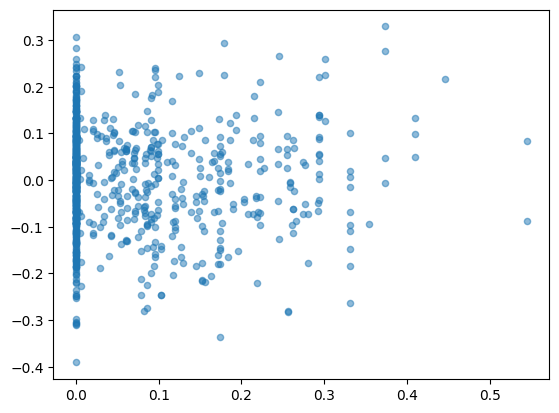

In [5]:
plt.figure()
plt.scatter(overshoot, diff, alpha  = .5, s = 20)
plt.show()

In [6]:
# find trajectories that have comparable soc and eoc values: 
from itertools import product

pairs = []
for i in tqdm(range(1000), total = 1000):
    for j in range(i+1,1000):
        if (np.abs(glmt_char_df['gmt_soc'].values[i]-glmt_char_df['gmt_soc'].values[j]) < 0.01) & (np.abs(glmt_char_df['gmt_eoc'].values[i]-glmt_char_df['gmt_eoc'].values[j]) < 0.01):
            pairs.append((i,j))

  0%|          | 0/1000 [00:00<?, ?it/s]

In [7]:
gmt_df = pd.read_csv(cset.path_MESMER_char / f'gmt_dataset.csv', index_col = 0)
columns = gmt_df.columns

In [8]:
iso = 'AUS'

diff      = []
overshoot = []
for i,j in tqdm(pairs, total = len(pairs)): 
    country_df = gdp_df[gdp_df.iso == iso].copy()
    os_tmp   = glmt_char_df['gmt_cum'].values[i]-glmt_char_df['gmt_cum'].values[j]
    diff_tmp = country_df[country_df.scen_run == columns[i]].diff_SSP2.values[0]-country_df[country_df.scen_run == columns[j]].diff_SSP2.values[0]
    if os_tmp > 0: 
        overshoot.append(os_tmp)
        diff.append(diff_tmp)
    else: 
        overshoot.append(-os_tmp)
        diff.append(-diff_tmp)        

  0%|          | 0/807 [00:00<?, ?it/s]

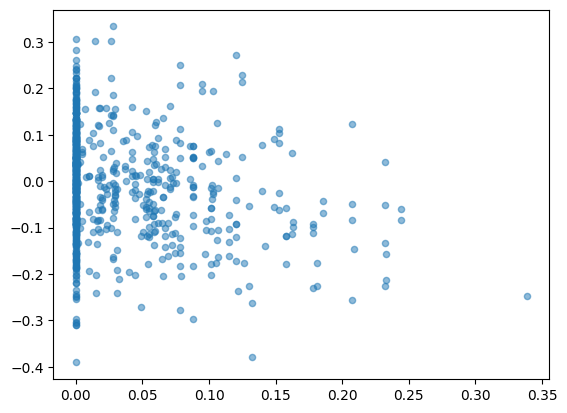

In [9]:
plt.figure()
plt.scatter(overshoot, diff, alpha  = .5, s = 20)
plt.show()

In [19]:
gmt_df.iloc[:, 500:600]

,Ref_1,Ref_2,Ref_3,Ref_4,Ref_5,Ref_6,Ref_7,Ref_8,Ref_9,Ref_10,...,Ref_91,Ref_92,Ref_93,Ref_94,Ref_95,Ref_96,Ref_97,Ref_98,Ref_99,Ref_100
2015.0,1.1843,1.0660,1.0660,1.0660,1.4809,1.1807,1.1589,1.1589,1.1589,1.1589,...,1.1110,1.1110,1.1110,1.1110,1.1294,1.0558,1.0558,1.2261,1.1789,1.1789
2016.0,1.2084,1.0897,1.0897,1.0897,1.5159,1.1928,1.1776,1.1776,1.1776,1.1776,...,1.1208,1.1208,1.1208,1.1208,1.1598,1.0671,1.0671,1.2403,1.1927,1.1927
2017.0,1.2335,1.1134,1.1134,1.1134,1.5510,1.2062,1.1975,1.1975,1.1975,1.1975,...,1.1323,1.1323,1.1323,1.1323,1.1916,1.0813,1.0813,1.2557,1.2075,1.2075
2018.0,1.2595,1.1375,1.1375,1.1375,1.5867,1.2209,1.2187,1.2187,1.2187,1.2187,...,1.1454,1.1454,1.1454,1.1454,1.2239,1.0975,1.0975,1.2721,1.2235,1.2235
2019.0,1.2848,1.1608,1.1608,1.1608,1.6217,1.2353,1.2394,1.2394,1.2394,1.2394,...,1.1581,1.1581,1.1581,1.1581,1.2547,1.1133,1.1133,1.2879,1.2394,1.2394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096.0,1.6554,1.6738,1.6738,1.6738,2.4244,1.3115,1.5278,1.5278,1.5278,1.5278,...,1.2489,1.2489,1.2489,1.2489,1.8667,1.2790,1.2790,1.4691,1.4148,1.4148
2097.0,1.6554,1.6738,1.6738,1.6738,2.4244,1.3115,1.5278,1.5278,1.5278,1.5278,...,1.2489,1.2489,1.2489,1.2489,1.8667,1.2790,1.2790,1.4691,1.4148,1.4148
2098.0,1.6554,1.6738,1.6738,1.6738,2.4244,1.3115,1.5278,1.5278,1.5278,1.5278,...,1.2489,1.2489,1.2489,1.2489,1.8667,1.2790,1.2790,1.4691,1.4148,1.4148
2099.0,1.6554,1.6738,1.6738,1.6738,2.4244,1.3115,1.5278,1.5278,1.5278,1.5278,...,1.2489,1.2489,1.2489,1.2489,1.8667,1.2790,1.2790,1.4691,1.4148,1.4148


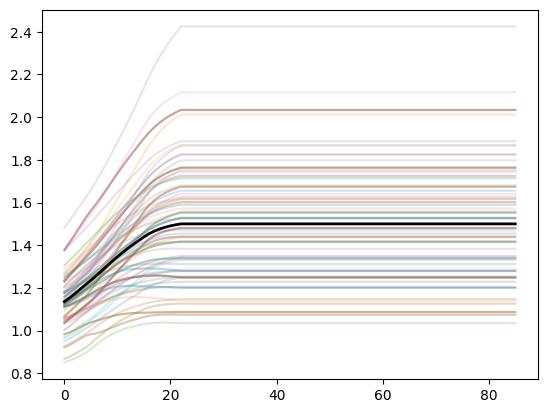

In [23]:
plt.figure()
plt.plot(gmt_df.values[:, 500:600], alpha  = .2)
plt.plot(np.mean(gmt_df.values[:, 500:600], axis = 1),  color = 'black', lw = 2)
plt.show()

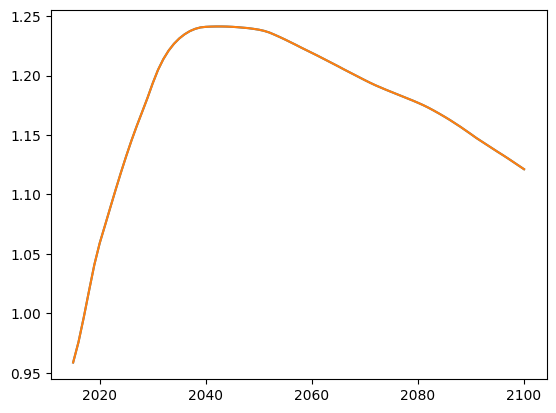

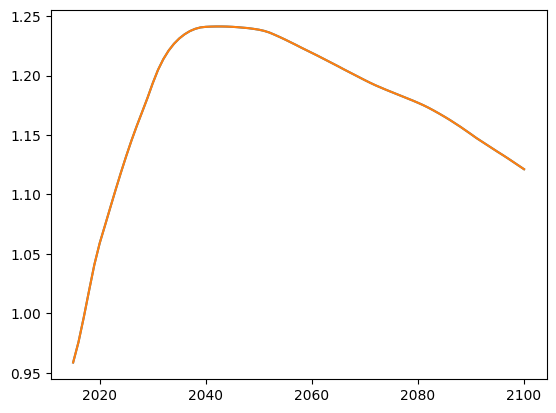

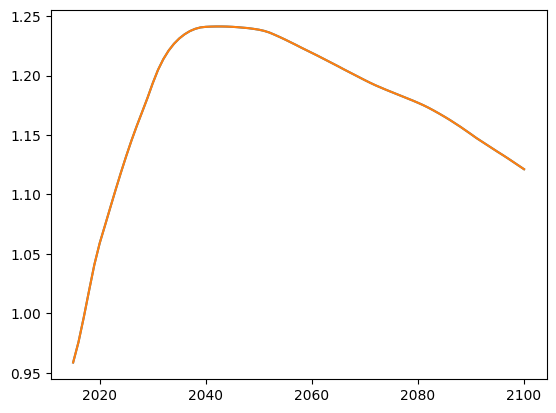

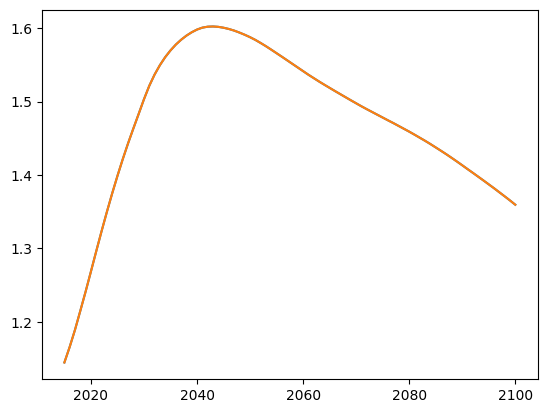

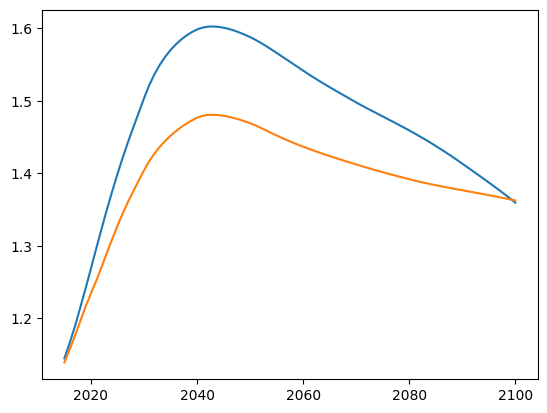

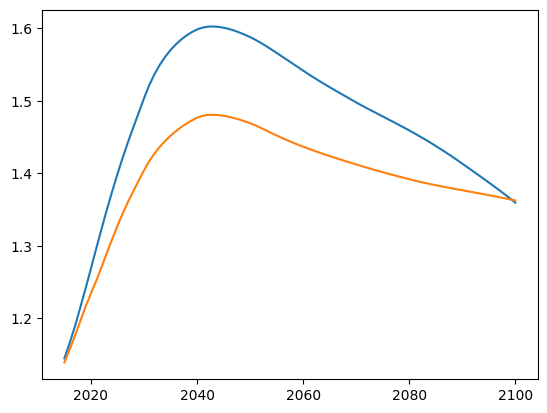

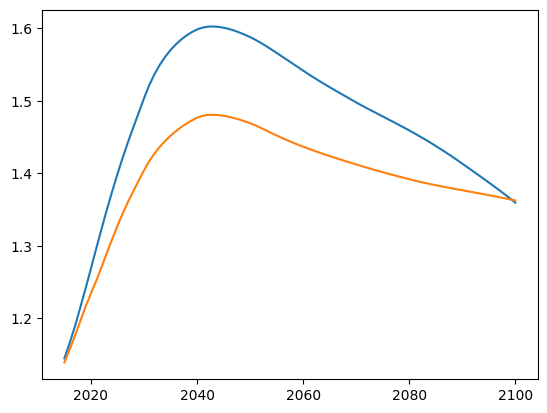

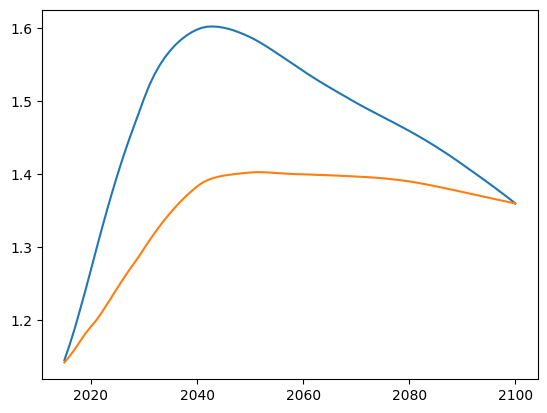

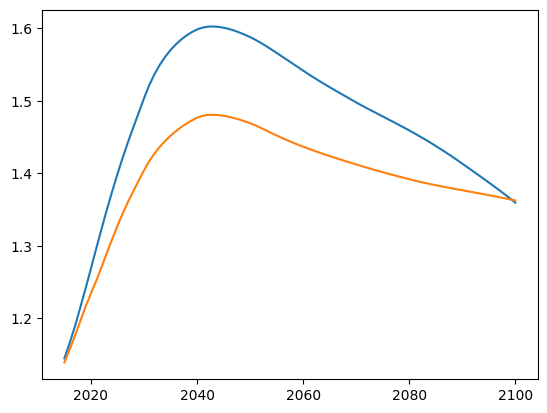

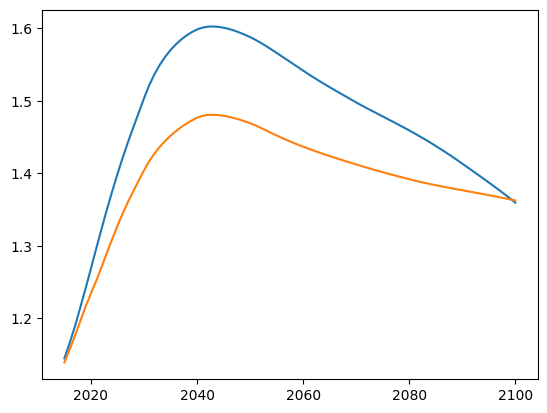

In [11]:
for i,j in pairs[:10]:
    plt.figure()
    plt.plot(gmt_df.iloc[:, i])
    plt.plot(gmt_df.iloc[:, j])
    plt.show()

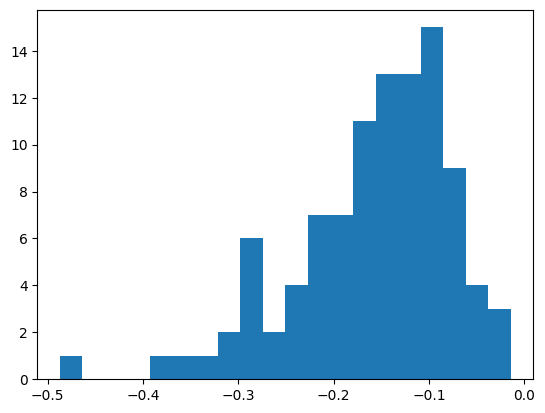

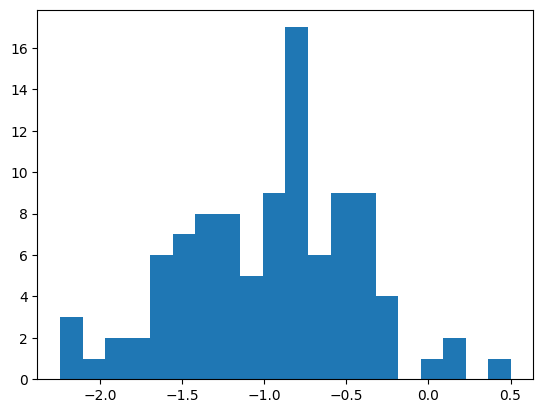

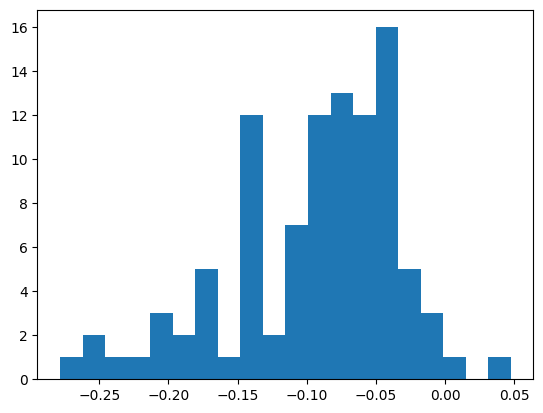

In [12]:
isoA = 'AFG'
isoB = 'IND'
isoC = 'USA'
plt.figure()
plt.hist(np.log(gdp_df[(gdp_df.iso == isoA) & (gdp_df.scen_run.str.contains('ssp534-over'))].diff_SSP2.values), bins=20)
plt.show()
plt.figure()
plt.hist(np.log(gdp_df[(gdp_df.iso == isoB) & (gdp_df.scen_run.str.contains('ssp534-over'))].diff_SSP2.values), bins=20)
plt.show()
plt.figure()
plt.hist(np.log(gdp_df[(gdp_df.iso == isoC) & (gdp_df.scen_run.str.contains('ssp534-over'))].diff_SSP2.values), bins=20)
plt.show()

In [ ]:
isoA = 'AFG'
isoB = 'IND'
isoC = 'USA'
plt.figure()
plt.hist(np.log(gdp_df[(gdp_df.iso == isoA) & (gdp_df.scen_run.str.contains('ssp534-over'))].diff_SSP2.values), bins=20)
plt.show()
plt.figure()
plt.hist(np.log(gdp_df[(gdp_df.iso == isoB) & (gdp_df.scen_run.str.contains('ssp534-over'))].diff_SSP2.values), bins=20)
plt.show()
plt.figure()
plt.hist(np.log(gdp_df[(gdp_df.iso == isoC) & (gdp_df.scen_run.str.contains('ssp534-over'))].diff_SSP2.values), bins=20)
plt.show()

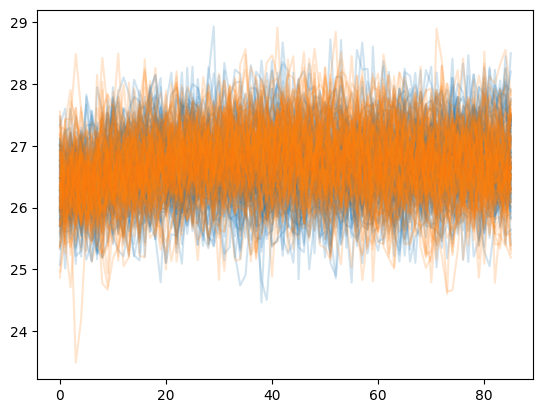

In [84]:
iso = 'BGD'
plt.figure()
plt.plot(tas_df[(tas_df.iso == iso) & (tas_df.run.str.contains(f'Ref_1p5'))].tas.values.reshape(100, -1).T, color = 'C0', alpha = .2)
plt.plot(tas_df[(tas_df.iso == iso) & (tas_df.run.str.contains(f'Neg'))].tas.values.reshape(100, -1).T, color = 'C1', alpha = .2)
plt.show()

In [86]:
gdp_df[(gdp_df.iso == iso) & (gdp_df.year == 2100)].diff_SSP2

1203000    0.595405
1203001    0.492051
1203002    0.317938
1203003    0.801531
1203004    0.391799
             ...   
1203995    0.700811
1203996    0.712650
1203997    0.276762
1203998    0.571443
1203999    0.355871
Name: diff_SSP2, Length: 1000, dtype: float64

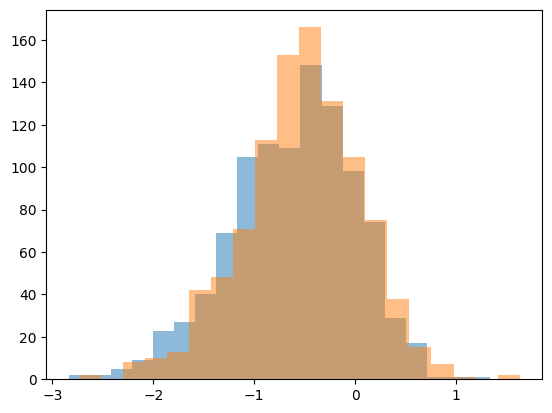

In [13]:
isoA = 'NGA'
isoB = 'IND'
isoC = 'IND'
plt.figure()
plt.hist(np.log(gdp_df[(gdp_df.iso == isoA) & (gdp_df.year == 2100)].diff_SSP2), bins = 20, color = 'C0', alpha = .5)
plt.hist(np.log(gdp_df[(gdp_df.iso == isoB) & (gdp_df.year == 2100)].diff_SSP2), bins = 20, color = 'C1', alpha = .5)
plt.show()

KeyboardInterrupt: 

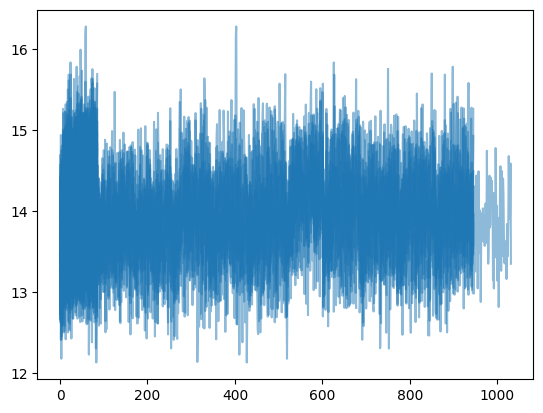

In [14]:
iso = 'USA'
plt.figure()
for i_run in range(1,101):
    plt.plot(tas_df[(tas_df.iso == iso) & (tas_df.run.str.contains(f'Ref_1p5_{i_run}'))].tas.values, color = 'C0', alpha = .5)
    plt.plot(tas_df[(tas_df.iso == iso) & (tas_df.run.str.contains(f'ssp534-over_{i_run}'))].tas.values, color = 'C1', alpha = .5)
plt.show()

In [24]:
gdp_ref = gdp_df[(gdp_df.scen_run.str.contains('Ref'))].loc[:, ['iso', 'diff_SSP2']].copy()
gdp_neg = gdp_df[(gdp_df.scen_run.str.contains('Neg'))].loc[:, ['iso', 'diff_SSP2']].copy()
tas_baseline = tas_df.loc[:, ['iso', 'tas']].groupby('iso').mean()
tas_baseline = tas_baseline.loc[gdp_neg.iso.unique(),:]

In [25]:
def q1(x):
    return x.quantile(0.1)

def q9(x):
    return x.quantile(0.9)

def q05(x):
    return x.quantile(0.05)

def q95(x):
    return x.quantile(0.95)

f = {'diff_SSP2': ['median', 'std', q1, q9, q05, q95]}
gdp_ref_agg = gdp_ref.groupby('iso').agg(f).loc[:, 'diff_SSP2'].copy()
gdp_neg_agg = gdp_neg.groupby('iso').agg(f).loc[:, 'diff_SSP2'].copy()

In [38]:
gdp_df[(gdp_df.scen_run.str.contains('Ref'))]

,iso,scen,run,year,diff_SSP2,SSP2,scen_run
85500,AFG,Ref,1,2100,0.952704,30868.560211,Ref_1
85501,AFG,Ref,2,2100,0.898519,30868.560211,Ref_2
85502,AFG,Ref,3,2100,0.917709,30868.560211,Ref_3
85503,AFG,Ref,4,2100,0.923286,30868.560211,Ref_4
85504,AFG,Ref,5,2100,0.888697,30868.560211,Ref_5
...,...,...,...,...,...,...,...
13501595,ZWE,Ref,96,2100,0.569809,33073.686961,Ref_96
13501596,ZWE,Ref,97,2100,0.533149,33073.686961,Ref_97
13501597,ZWE,Ref,98,2100,0.911956,33073.686961,Ref_98
13501598,ZWE,Ref,99,2100,0.878317,33073.686961,Ref_99


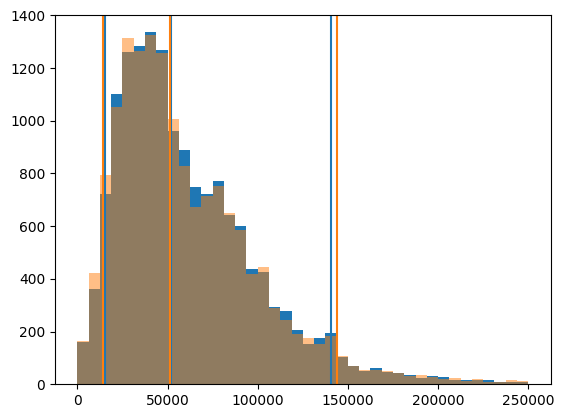

In [56]:
gdp_ref_2 = gdp_df[(gdp_df.scen_run.str.contains('Ref'))].loc[:, ['iso', 'SSP2_clim']].copy()
gdp_neg_2 = gdp_df[(gdp_df.scen_run.str.contains('Neg'))].loc[:, ['iso', 'SSP2_clim']].copy()

plt.figure()
plt.hist(gdp_ref_2['SSP2_clim'], bins  = 40, range = (0,0.25*10**6))
plt.hist(gdp_neg_2['SSP2_clim'], bins = 40, range = (0,0.25*10**6),alpha = .5)
plt.axvline(np.quantile(gdp_ref_2['SSP2_clim'], 0.05), color = 'C0')
plt.axvline(np.quantile(gdp_ref_2['SSP2_clim'], 0.5), color = 'C0')
plt.axvline(np.quantile(gdp_ref_2['SSP2_clim'], 0.95), color = 'C0')
plt.axvline(np.quantile(gdp_neg_2['SSP2_clim'], 0.05), color = 'C1')
plt.axvline(np.quantile(gdp_neg_2['SSP2_clim'], 0.5), color = 'C1')
plt.axvline(np.quantile(gdp_neg_2['SSP2_clim'], 0.95), color = 'C1')
plt.show()

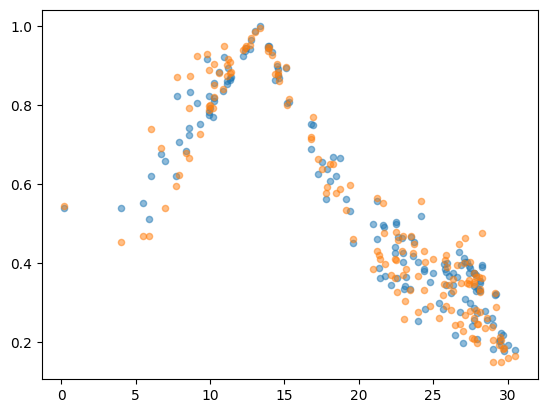

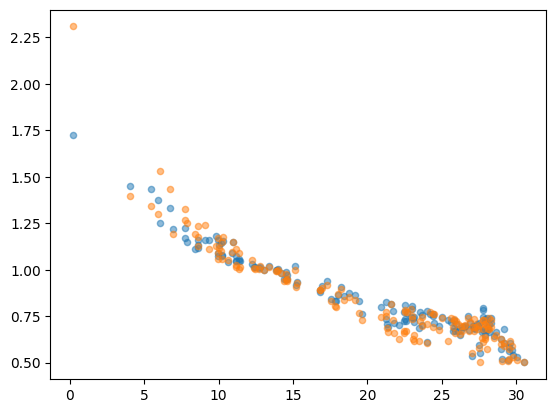

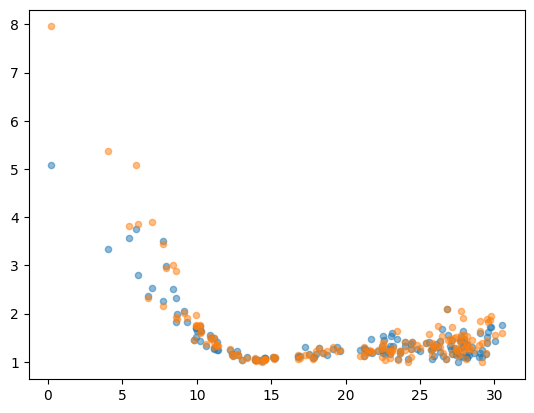

In [57]:
plt.figure()
plt.scatter(tas_baseline.tas.values, gdp_ref_agg.loc[:, 'q05'].values, color = 'C0', alpha = .5, s = 20)
plt.scatter(tas_baseline.tas.values, gdp_neg_agg.loc[:, 'q05'].values, color = 'C1', alpha = .5, s = 20)
plt.show()
plt.figure()
plt.scatter(tas_baseline.tas.values, gdp_ref_agg.loc[:, 'median'].values, color = 'C0', alpha = .5, s = 20)
plt.scatter(tas_baseline.tas.values, gdp_neg_agg.loc[:, 'median'].values, color = 'C1', alpha = .5, s = 20)
plt.show()
plt.figure()
plt.scatter(tas_baseline.tas.values, gdp_ref_agg.loc[:, 'q95'].values, color = 'C0', alpha = .5, s = 20)
plt.scatter(tas_baseline.tas.values, gdp_neg_agg.loc[:, 'q95'].values, color = 'C1', alpha = .5, s = 20)
plt.show()

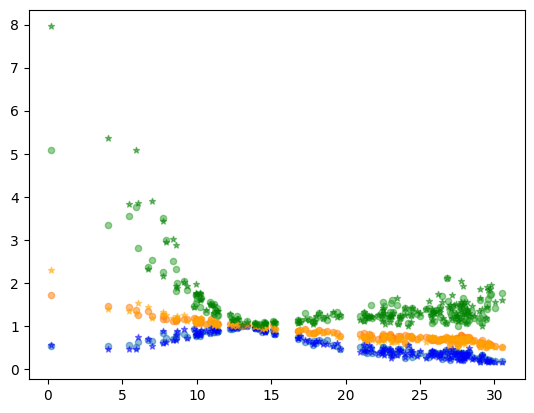

In [27]:
plt.figure()
plt.scatter(tas_baseline.tas.values, gdp_ref_agg.loc[:, 'q05'].values, color = 'C0', alpha = .5, s = 20)
plt.scatter(tas_baseline.tas.values, gdp_ref_agg.loc[:, 'median'].values, color = 'C1', alpha = .5, s = 20)
plt.scatter(tas_baseline.tas.values, gdp_ref_agg.loc[:, 'q95'].values, color = 'C2', alpha = .5, s = 20)
plt.scatter(tas_baseline.tas.values, gdp_neg_agg.loc[:, 'q05'].values, color = 'blue', alpha = .5, s = 20, marker = '*')
plt.scatter(tas_baseline.tas.values, gdp_neg_agg.loc[:, 'median'].values, color = 'orange', alpha = .5, s = 20,  marker = '*')
plt.scatter(tas_baseline.tas.values, gdp_neg_agg.loc[:, 'q95'].values, color = 'green', alpha = .5, s = 20, marker = '*')
plt.show()
# plt.figure()
# plt.scatter(tas_baseline.tas.values, gdp_neg_agg.loc[:, 'q05'].values, color = 'blue', alpha = .5, s = 40, marker = '*')
# plt.scatter(tas_baseline.tas.values, gdp_neg_agg.loc[:, 'median'].values, color = 'orange', alpha = .5, s = 40,  marker = '*')
# plt.scatter(tas_baseline.tas.values, gdp_neg_agg.loc[:, 'q95'].values, color = 'green', alpha = .5, s = 40, marker = '*')
# plt.show()

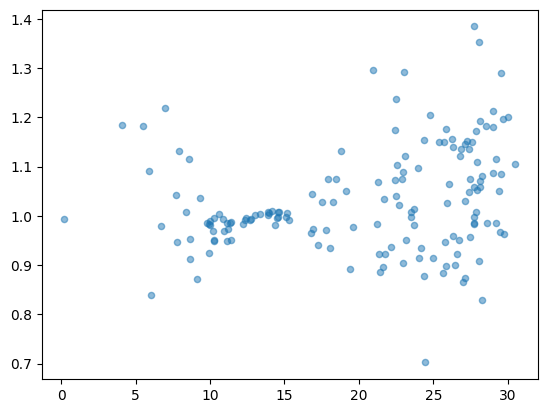

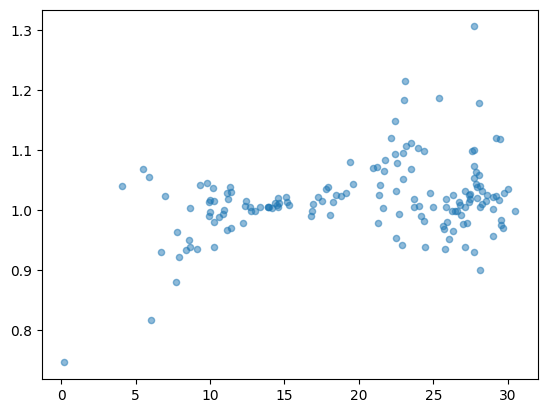

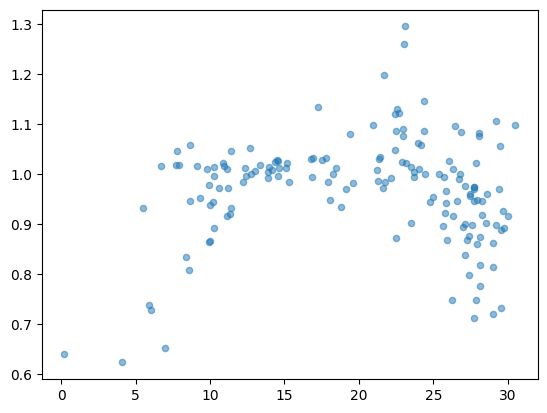

In [28]:
plt.figure()
plt.scatter(tas_baseline.tas.values, gdp_ref_agg.loc[:, 'q05'].values/gdp_neg_agg.loc[:, 'q05'].values, color = 'C0', alpha = .5, s = 20)
plt.show()
plt.figure()
plt.scatter(tas_baseline.tas.values, gdp_ref_agg.loc[:, 'median'].values/gdp_neg_agg.loc[:, 'median'].values, color = 'C0', alpha = .5, s = 20)
plt.show()
plt.figure()
plt.scatter(tas_baseline.tas.values, gdp_ref_agg.loc[:, 'q95'].values/gdp_neg_agg.loc[:, 'q95'].values, color = 'C0', alpha = .5, s = 20)
plt.show()

  0%|          | 0/157 [00:00<?, ?it/s]

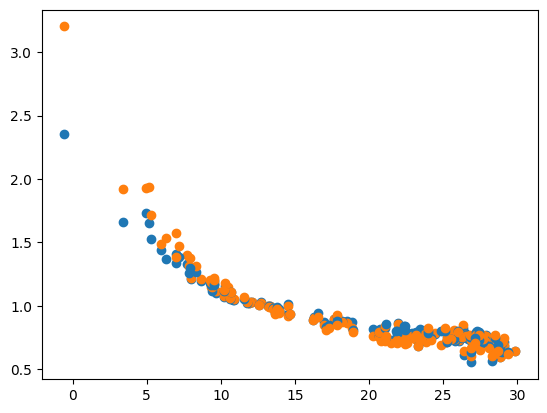

In [59]:
plt.figure()
for iso in tqdm(tas_df.iso.unique(), total = 176):
    gdp_sub =  gdp_df[(gdp_df.iso == iso)]
    tas_baseline = tas_df[(tas_df.iso == iso) & (tas_df.year == 2015)].tas.mean()
    gdp_ref = gdp_sub[gdp_sub.scen == 'Ref'].diff_SSP2.mean()
    gdp_neg = gdp_sub[gdp_sub.scen == 'Neg'].diff_SSP2.mean()
    plt.scatter(tas_baseline, gdp_ref-gpd_neg, color = 'C0')
    # plt.scatter(tas_baseline, gdp_neg, color = 'C1')
plt.show()

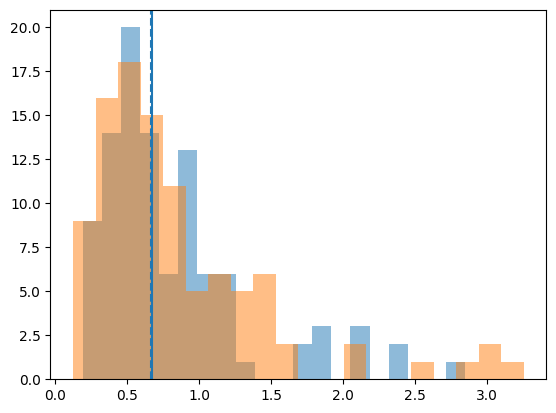

In [29]:
iso = 'BGD'
plt.figure()
plt.hist(gdp_df[(gdp_df.iso == iso) & (gdp_df.scen.str.contains('Ref'))].diff_SSP2, bins = 20, alpha = 0.5)
plt.hist(gdp_df[(gdp_df.iso == iso) & (gdp_df.scen.str.contains('Neg'))].diff_SSP2, bins = 20, alpha = 0.5)
plt.axvline(np.median(gdp_df[(gdp_df.iso == iso) & (gdp_df.scen.str.contains('Ref'))].diff_SSP2))
plt.axvline(np.median(gdp_df[(gdp_df.iso == iso) & (gdp_df.scen.str.contains('Neg'))].diff_SSP2), linestyle = '--')
plt.show()

In [24]:
tas_df[tas_df.iso == 'NGA']

,iso,year,tas,run
114,NGA,2015,27.396196,CurPol_1
290,NGA,2016,27.591760,CurPol_1
466,NGA,2017,27.199149,CurPol_1
642,NGA,2018,27.827828,CurPol_1
818,NGA,2019,27.863913,CurPol_1
...,...,...,...,...
15135234,NGA,2096,27.435640,ssp534-over_99
15135410,NGA,2097,28.077686,ssp534-over_99
15135586,NGA,2098,28.031352,ssp534-over_99
15135762,NGA,2099,28.575643,ssp534-over_99


In [28]:
gdp_df

,iso,scen,run,year,diff_SSP2,SSP2,scen_run
85000,AFG,CurPol,1,2100,0.881178,30868.560211,CurPol_1
85001,AFG,CurPol,2,2100,0.892768,30868.560211,CurPol_2
85002,AFG,CurPol,3,2100,0.864742,30868.560211,CurPol_3
85003,AFG,CurPol,4,2100,0.839042,30868.560211,CurPol_4
85004,AFG,CurPol,5,2100,0.912099,30868.560211,CurPol_5
...,...,...,...,...,...,...,...
13501995,ZWE,ssp534-over,96,2100,0.396659,33073.686961,ssp534-over_96
13501996,ZWE,ssp534-over,97,2100,1.002097,33073.686961,ssp534-over_97
13501997,ZWE,ssp534-over,98,2100,0.431720,33073.686961,ssp534-over_98
13501998,ZWE,ssp534-over,99,2100,0.512406,33073.686961,ssp534-over_99


In [29]:
gdp_df = pd.read_csv(cset.file_burke).loc[:, ['iso', 'scen', 'run', 'year', 'diff_SSP2', 'SSP2']]
gdp_df.loc[gdp_df.scen == 'Ref1p5', 'scen'] = 'Ref'

In [30]:
gdp_df[(gdp_df.iso == 'NGA') & (gdp_df.year == 2016)]

,iso,scen,run,year,diff_SSP2,SSP2
8945000,NGA,CurPol,1,2016,0.999923,2714.812166
8945001,NGA,CurPol,2,2016,0.999923,2714.812166
8945002,NGA,CurPol,3,2016,0.999923,2714.812166
8945003,NGA,CurPol,4,2016,0.999923,2714.812166
8945004,NGA,CurPol,5,2016,0.999923,2714.812166
...,...,...,...,...,...,...
8945995,NGA,ssp534-over,96,2016,0.999923,2714.812166
8945996,NGA,ssp534-over,97,2016,0.999923,2714.812166
8945997,NGA,ssp534-over,98,2016,0.999923,2714.812166
8945998,NGA,ssp534-over,99,2016,0.999923,2714.812166


In [26]:
tas_df[(tas_df.iso == 'NGA') & (tas_df.year == 2016)]

,iso,year,tas,run
290,NGA,2016,27.591760,CurPol_1
15426,NGA,2016,26.899114,CurPol_10
30562,NGA,2016,27.738940,CurPol_100
45698,NGA,2016,26.774553,CurPol_11
60834,NGA,2016,27.547649,CurPol_12
...,...,...,...,...
15060610,NGA,2016,27.271672,ssp534-over_95
15075746,NGA,2016,27.529472,ssp534-over_96
15090882,NGA,2016,27.974807,ssp534-over_97
15106018,NGA,2016,27.550349,ssp534-over_98


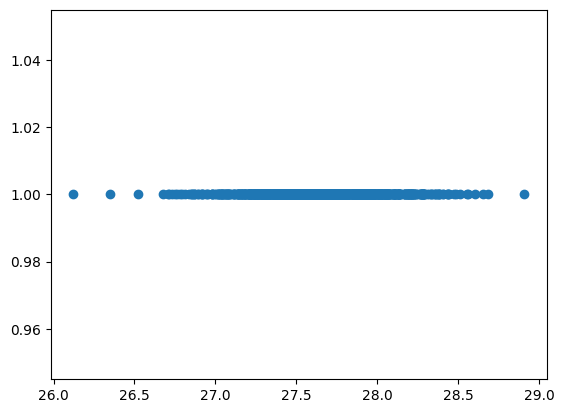

In [37]:
gdp_2016 = gdp_df[(gdp_df.iso == 'NGA') & (gdp_df.year == 2015)].diff_SSP2.values
tas_2016 = tas_df[(tas_df.iso == 'NGA') & (tas_df.year == 2015)].tas.values
plt.figure()
plt.scatter(tas_2016, gdp_2016)
plt.show()

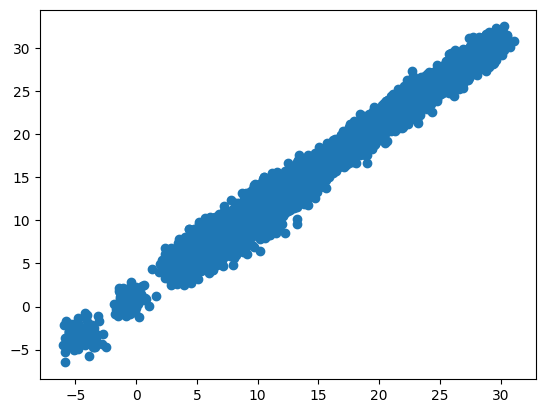

In [17]:
plt.figure()
plt.scatter(tas_df[(tas_df.year == 2015) & (tas_df.run.str.contains('ssp534-over'))].tas.values, 
            tas_df[(tas_df.year == 2100) & (tas_df.run.str.contains('ssp534-over'))].tas.values)
plt.show()

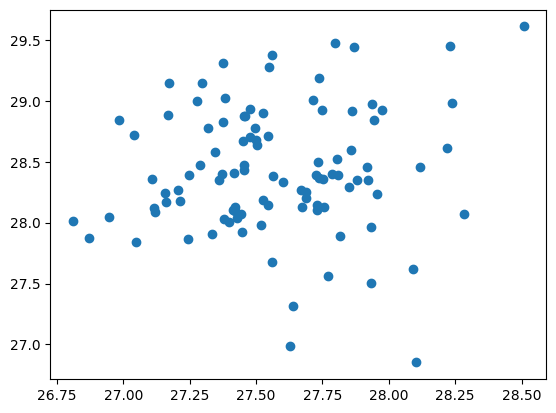

In [16]:
plt.figure()
plt.scatter(tas_df[(tas_df.iso == 'NGA') & (tas_df.year == 2015) & (tas_df.run.str.contains('ssp534-over'))].tas.values, 
            tas_df[(tas_df.iso == 'NGA') & (tas_df.year == 2100) & (tas_df.run.str.contains('ssp534-over'))].tas.values)
plt.show()

In [ ]:
plt.figure()
plt.plot(tas_df[tas_df.iso == 'NGA'])
plt.show()

In [20]:
tas_df

,iso,year,tas,run
0,AFG,2015,14.288971,CurPol_1
1,AGO,2015,22.903875,CurPol_1
2,ALB,2015,13.993974,CurPol_1
3,ARE,2015,28.970434,CurPol_1
4,ARG,2015,17.067125,CurPol_1
...,...,...,...,...
15135995,VUT,2100,NaN,ssp534-over_99
15135996,YEM,2100,28.326148,ssp534-over_99
15135997,ZAF,2100,18.323105,ssp534-over_99
15135998,ZMB,2100,23.111737,ssp534-over_99


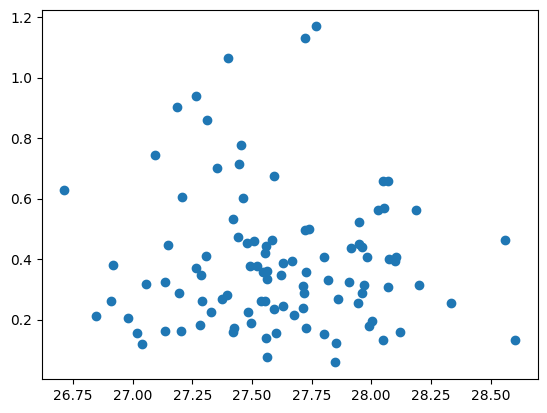

In [21]:
plt.figure()
plt.scatter(tas_df[(tas_df.iso == 'NGA') & (tas_df.run.str.contains('CurPol')) & (tas_df.year == 2015)].tas.values, 
            gdp_df[(gdp_df.iso == 'NGA') & (gdp_df.scen == 'CurPol')].diff_SSP2.values)
plt.show()

In [18]:
gdp_df

,iso,scen,run,year,diff_SSP2,SSP2,scen_run
85000,AFG,CurPol,1,2100,0.881178,30868.560211,CurPol_1
85001,AFG,CurPol,2,2100,0.892768,30868.560211,CurPol_2
85002,AFG,CurPol,3,2100,0.864742,30868.560211,CurPol_3
85003,AFG,CurPol,4,2100,0.839042,30868.560211,CurPol_4
85004,AFG,CurPol,5,2100,0.912099,30868.560211,CurPol_5
...,...,...,...,...,...,...,...
13501995,ZWE,ssp534-over,96,2100,0.396659,33073.686961,ssp534-over_96
13501996,ZWE,ssp534-over,97,2100,1.002097,33073.686961,ssp534-over_97
13501997,ZWE,ssp534-over,98,2100,0.431720,33073.686961,ssp534-over_98
13501998,ZWE,ssp534-over,99,2100,0.512406,33073.686961,ssp534-over_99
